# Основная часть

## Загрузка данных и первичный осмотр

### 1.Импортировать необходимые библиотеки:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2. Загрузить учебный датасет в pandas.DataFrame с помощью pd.read_csv (или другого подходящего метода).

In [9]:
file="S02-hw-dataset.csv"
data = pd.read_csv(file)

### 3.Вывести:

In [10]:
# первые строки датасета (допустим первые 10 строк)
data.head(n=10)

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


In [11]:
# информацию о столбцах и типах
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [14]:
# базовые описательные статистики
data.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


## Пропуски, дубликаты и базовый контроль качества

### 1.Посчитать долю пропусков в каждом столбце

In [15]:
data.isna().mean()

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

### 2.Проверить наличие полностью дублирующих строк

In [38]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
dtype: bool

## 3.Найти и вывести «подозрительные» случаи, исходя из смысла датасета.

In [42]:
bad_age = (data['age'] > 100) | (data['age'] < 6)
bad_purchases = (data['purchases'] < 0) | ((data['purchases'] == 0) & (data['revenue'] != 0))
bad_revenue = (data['revenue'] < 0) | ((data['revenue'] == 0) & (data['purchases'] != 0))
bad_rows = bad_age | bad_purchases | bad_revenue
print(data[bad_rows])
data = data[~bad_rows] #удаляем плохие строчки

    user_id    age country  purchases  revenue
5         6  120.0      FR         -1      785
10       11   24.0      US          4        0
20       21    5.0      RU          8     1488


Были обнаружены такие проблемы качества данных, как:
- некорректный возраст (больше 100 лет или меньше 6)
- несоответсвие параметра в столбце purchases и revenue (нулевой доход при ненулевом количестве покупок)
- отрицательное значение в столбце purchases (отрицательное количество покупок)

## Базовый EDA: группировки, агрегаты и частоты

### 1.Посчитать частоты для одной или двух категориальных переменных.

In [41]:
data.value_counts('country')

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

### 2.Выполнить хотя бы одну осмысленную группировку с агрегатами через groupby

In [44]:
data.groupby('country')['revenue'].mean() #средний доход людей из определенных стран

country
CN    1054.000000
DE    1445.500000
FR     666.000000
RU     731.916667
US     637.000000
Name: revenue, dtype: float64

Анализ среднего дохода по странам:
- лидер по доходности - Германия (DE)
- средние значени по продажам - Россия (RU)
- неожиданных эффектов не обнаружено

# Визуализация данных в Matplotlib

## Гистограмма

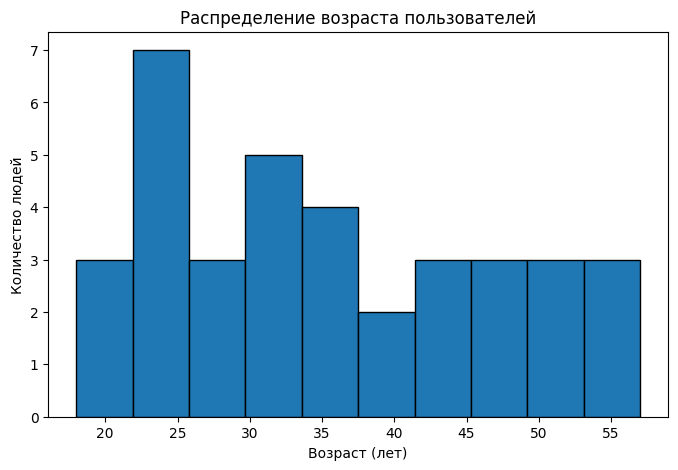

In [56]:
plt.figure(figsize=(8, 5))

plt.hist(data['age'], bins=10, edgecolor='black')

plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст (лет)')
plt.ylabel('Количество людей')

plt.show()

## Боксплот

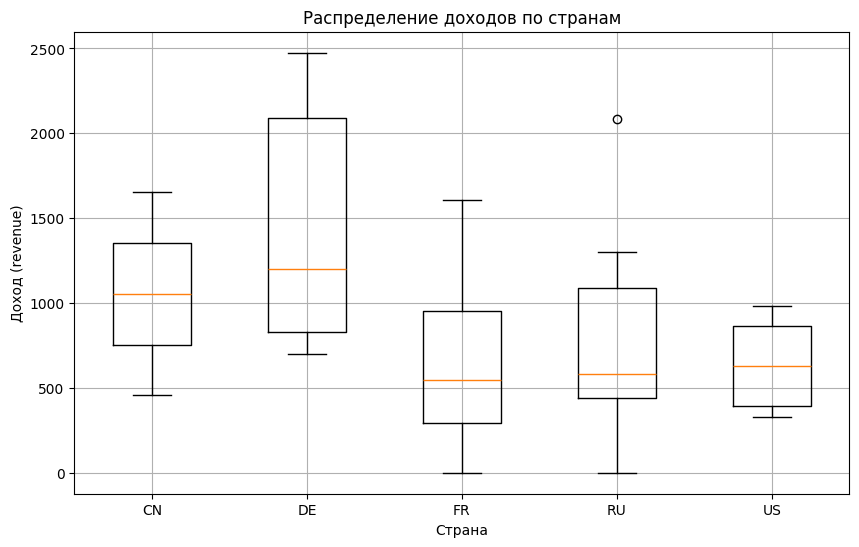

In [54]:
plt.figure(figsize=(10, 6))

groups = data.groupby('country')['revenue'].apply(list)

plt.boxplot(groups.values, tick_labels=groups.index)

plt.title('Распределение доходов по странам')
plt.xlabel('Страна')
plt.ylabel('Доход (revenue)')

plt.grid(True)
plt.show()

## Scatter plot (диаграмма рассеяния)

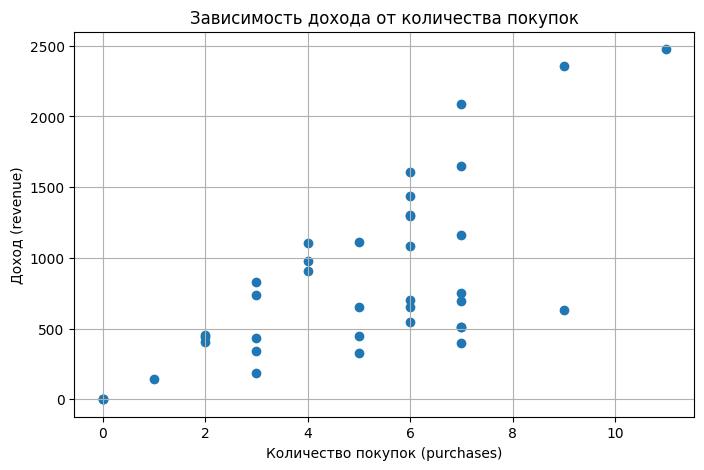

In [59]:
plt.figure(figsize=(8, 5))

plt.scatter(data['purchases'], data['revenue'])

plt.title('Зависимость дохода от количества покупок')
plt.xlabel('Количество покупок (purchases)')
plt.ylabel('Доход (revenue)')

plt.savefig('figures/scatter_plot.png')
plt.grid(True)
plt.show()

## Сохранить минимум один из построенных графиков в папку homeworks/HW02/figures/

за это отвечает plt.savefig('figures/scatter_plot.png') в прошлом задании